<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contents" data-toc-modified-id="Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contents</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Importing" data-toc-modified-id="Importing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Inspect-Data" data-toc-modified-id="Inspect-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inspect Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Output-Clean-Data" data-toc-modified-id="Output-Clean-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Output Clean Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#LR-Model-Exploratory" data-toc-modified-id="LR-Model-Exploratory-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>LR Model Exploratory</a></span></li><li><span><a href="#Create-Feature-Matrix-and-Target" data-toc-modified-id="Create-Feature-Matrix-and-Target-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Create Feature Matrix and Target</a></span></li><li><span><a href="#LR-Model" data-toc-modified-id="LR-Model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>LR Model</a></span></li><li><span><a href="#Ridge-Model" data-toc-modified-id="Ridge-Model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Ridge Model</a></span></li><li><span><a href="#Lasso-Model" data-toc-modified-id="Lasso-Model-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Lasso Model</a></span></li><li><span><a href="#Output-Model-Predictions" data-toc-modified-id="Output-Model-Predictions-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Output Model Predictions</a></span></li><li><span><a href="#Kaggle-Submission" data-toc-modified-id="Kaggle-Submission-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Kaggle Submission</a></span></li><li><span><a href="#Descriptive-and-Inferential-Statistics" data-toc-modified-id="Descriptive-and-Inferential-Statistics-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Descriptive and Inferential Statistics</a></span></li><li><span><a href="#Outside-Research" data-toc-modified-id="Outside-Research-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Outside Research</a></span></li><li><span><a href="#Conclusions-and-Recommendations" data-toc-modified-id="Conclusions-and-Recommendations-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Conclusions and Recommendations</a></span></li></ul></div>

# Project 2 - Ames Housing Data and Kaggle Challenge

### Contents

- [Problem Statement](#Problem-Statement)


- [Importing](#Importing)
- [Functions](#Functions)


- [Inspect Data](#Inspect-Data)
- [Clean Data](#Clean-Data)
- [Output Clean Data](#Output-Clean-Data)


- [EDA](#EDA)


- [LR Model Exploratory](#LR-Model-Exploratory)
- [Create Feature Matrix and Target](#Create-Feature-Matrix-and-Target)
- [LR Model](#LR-Model)
- [Ridge Model](#Ridge-Model)
- [Lasso Model](#Lasso-Model)


- [Output Model Predictions](#Output-Model-Predictions)
- [Kaggle Submission](#Kaggle-Submission)


- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Problem Statement

- To analyze the Ames Housing Dataset from the Ames Assessor’s Office.
- The dataset contains information on residential properties sold in Ames (Iowa) from 2006 to 2010.
- To develop a regression model to predict the sale prices of houses.
- The model will be used by real estate agents to predict house prices.
- Recommendations will provide insights for homeowners to increase house prices through home improvements.

### Importing

In [1]:
# user configuration

# toggle to create models with/without outliers
remove_outliers_flag = True

# toggle to output predictions to csv
output_predictions_flag = True

In [2]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet 
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

# html
from IPython.display import Image
from IPython.core.display import HTML

# others
import datetime as dt
#import re
#import os

In [3]:
# file paths

input_path = '../data/input/'
mid_path = '../data/mid/'
output_path = '../data/output/'

image_path = '../images/'

In [4]:
# import raw data

df_train = pd.read_csv(input_path + 'train.csv')
df_test = pd.read_csv(input_path + 'test.csv')

# purpose of columns.csv:
# 1) convert column names
# 2) define type e.g. dummy, scale
# 3) quick feature selection
# note: date and set types not used due to project time constraint
# date: create datetime from sales_month and sales_year
# set: create set for condition_1 and condition_2 (remove dulipcates)
df_cols = pd.read_csv(input_path + 'columns.csv')

In [5]:
# define dictionaries

lot_subclass_dict = {

'20':'020 1-STORY 1946 & NEWER ALL STYLES',
'30':'030 1-STORY 1945 & OLDER',
'40':'040 1-STORY W/FINISHED ATTIC ALL AGES',
'45':'045 1-1/2 STORY - UNFINISHED ALL AGES',
'50':'050 1-1/2 STORY FINISHED ALL AGES',
'60':'060 2-STORY 1946 & NEWER',
'70':'070 2-STORY 1945 & OLDER',
'75':'075 2-1/2 STORY ALL AGES',
'80':'080 SPLIT OR MULTI-LEVEL',
'85':'085 SPLIT FOYER',
'90':'090 DUPLEX - ALL STYLES AND AGES',
'120':'120 1-STORY PUD - 1946 & NEWER',
'150':'150 1-1/2 STORY PUD - ALL AGES',
'160':'160 2-STORY PUD - 1946 & NEWER',
'180':'180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
'190':'190 2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

lot_zone_dict = {
    
'a (agr)':'Agriculture',
'c (all)':'Commercial',
'fv':'Floating Village',
'i (all)':'Industrial',
'rh':'Residential (High)',
'rl':'Residential (Low)',
'rk':'Residential (Low)',
'rm':'Residential (Med)'
}

### Functions

In [6]:
def create_scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None,size=None):    
        
    plt.figure(figsize=(20,12))
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("bright",n_colors=16)
      
    #sns.regplot(data,x=x,y=y)        
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette,size=size,sizes=(10, 200))

    #plt.xlim(min_x,max_x)
    #plt.ylim(min_x,max_x)
                    
    plt.title(title,fontsize=25)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.tick_params(labelsize=15)

In [7]:
def create_boxplot(data,x,y,title=''):
    
    plt.figure(figsize=(20,12))
    
    b = sns.boxplot(data=data,x=x,y=y)
    b.axes.set_title(title,fontsize=25)
    b.set_xlabel(x,fontsize=20)
    b.set_ylabel(y,fontsize=20)
    b.tick_params(labelsize=15)

In [8]:
def create_lr_model(df,cols,cv=5):
    
    # create X (feature matrix) and y (target)
    X = df.loc[:,cols]
    X = X.values
    y = df['sale_price']
    
    # using holdout method
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=3050)
    
    model = lr.fit(X_train,y_train)
    print('coef: {} intercept: {}'.format(model.coef_,model.intercept_))

    score = model.score(X_test,y_test)
    print('score:',score)

    cvs = cross_val_score(model,X,y,cv=cv)    
    mean = np.mean(cvs)
    print('cvs:',mean,cvs)
    
    return model

### Inspect Data

In [9]:
# list all columns in df_train

print(df_train.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [10]:
# output 1st 5 records in df_train

df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

df_train_info = df_train.describe()
df_train_info

In [11]:
# Check for nulls in columns

null_cols = df_train.isnull().sum()
mask_null = null_cols > 0
null_cols[mask_null].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [12]:
# Check for nulls in rows

null_rows = df_train.isnull().sum(axis=1)
mask_null = null_rows > 0
null_rows[mask_null].sort_values(ascending=False)

114     16
580     15
437     15
1327    15
2010    15
1594    15
1428    15
1098    14
700     14
256     14
276     12
1007    11
1049    11
737     11
514     11
1211    11
616     11
1372    11
334     11
1125    11
1464    10
1686    10
964     10
954     10
942     10
924     10
901     10
878     10
824     10
1799    10
        ..
1961     3
1844     3
1471     3
159      3
1989     2
761      2
657      2
1225     2
1246     2
149      2
424      2
1134     2
1635     2
29       2
1422     2
1679     2
1707     2
1373     2
1002     2
2032     2
107      2
1652     2
1130     2
110      2
1133     2
1405     2
1756     2
1759     2
52       1
974      1
Length: 2051, dtype: int64

In [13]:
# show column summary

df_train_info = df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [14]:
# find columns with the most empty cells

df_train.count(axis=0).sort_values()

Pool QC               9
Misc Feature         65
Alley               140
Fence               400
Fireplace Qu       1051
Lot Frontage       1721
Garage Finish      1937
Garage Qual        1937
Garage Cond        1937
Garage Yr Blt      1937
Garage Type        1938
Bsmt Exposure      1993
BsmtFin Type 2     1995
Bsmt Qual          1996
BsmtFin Type 1     1996
Bsmt Cond          1996
Mas Vnr Type       2029
Mas Vnr Area       2029
Bsmt Full Bath     2049
Bsmt Half Bath     2049
BsmtFin SF 1       2050
Garage Area        2050
BsmtFin SF 2       2050
Bsmt Unf SF        2050
Total Bsmt SF      2050
Garage Cars        2050
Bedroom AbvGr      2051
Half Bath          2051
Full Bath          2051
Kitchen AbvGr      2051
                   ... 
Lot Area           2051
Street             2051
Lot Shape          2051
Land Contour       2051
Utilities          2051
Lot Config         2051
Land Slope         2051
Neighborhood       2051
Condition 1        2051
Condition 2        2051
Bldg Type       

### Clean Data

In [15]:
# rename columns

df_train.columns = df_cols['new_name']
df_test.columns = df_cols['new_name'][0:-1] # df_test doesn't have sale_price column

In [16]:
# df_train: option to remove outliers
# df_test: do not remove outliers

if remove_outliers_flag == True:
    
    print('before:',len(df_train))
    
    # note: author of DataDocumentation.txt recommends to remove houses > 4000 sqft
    mask_no_outliers = df_train['grd_total_area'] > 4000
    df_train = df_train[~mask_no_outliers]
    
    print('after:',len(df_train))

before: 2051
after: 2049


In [17]:
# convert all string in cells to lowercase -> prevent duplicates when creating dummies

df_train = df_train.applymap(lambda s:s.lower() if type(s) == str else s)
df_test = df_test.applymap(lambda s:s.lower() if type(s) == str else s)

In [18]:
# fill nan/empty cells with na

cols = ['pool_qual','bsmt_qual','fireplace_score','garage_qual','garage_cond','bsmt_type1_score','bsmt_type2_score']

for col in cols:
    df_train[col] = df_train[col].fillna(value='na')
    df_test[col] = df_test[col].fillna(value='na')

In [19]:
# check changes for df_train

df_train[cols].head()

new_name pool_qual bsmt_qual fireplace_score garage_qual garage_cond  \
0               na        ta              na          ta          ta   
1               na        gd              ta          ta          ta   
2               na        ta              na          ta          ta   
3               na        gd              na          ta          ta   
4               na        fa              na          ta          ta   

new_name bsmt_type1_score bsmt_type2_score  
0                     glq              unf  
1                     glq              unf  
2                     glq              unf  
3                     unf              unf  
4                     unf              unf

In [20]:
# check changes for df_train

df_train[cols].head()

new_name pool_qual bsmt_qual fireplace_score garage_qual garage_cond  \
0               na        ta              na          ta          ta   
1               na        gd              ta          ta          ta   
2               na        ta              na          ta          ta   
3               na        gd              na          ta          ta   
4               na        fa              na          ta          ta   

new_name bsmt_type1_score bsmt_type2_score  
0                     glq              unf  
1                     glq              unf  
2                     glq              unf  
3                     unf              unf  
4                     unf              unf

In [21]:
# fill nan/empty cells with 0

cols = ['bath_half_bsmt_num','bath_full_bsmt_num','garage_area','garage_car_num','bsmt_total_area',
        'bsmt_unfinish_area','bsmt_type2_area','bsmt_type1_area']

for col in cols:
    df_train[col] = df_train[col].fillna(value='0')
    df_test[col] = df_test[col].fillna(value='0')

In [22]:
# check changes for df_train

df_train[cols].head()

new_name bath_half_bsmt_num bath_full_bsmt_num garage_area garage_car_num  \
0                         0                  0         475              2   
1                         0                  1         559              2   
2                         0                  1         246              1   
3                         0                  0         400              2   
4                         0                  0         484              2   

new_name bsmt_total_area bsmt_unfinish_area bsmt_type2_area bsmt_type1_area  
0                    725                192               0             533  
1                    913                276               0             637  
2                   1057                326               0             731  
3                    384                384               0               0  
4                    676                676               0               0

In [23]:
# check changes df_test

df_test[cols].head()

new_name  bath_half_bsmt_num  bath_full_bsmt_num  garage_area  garage_car_num  \
0                          0                   0          440               1   
1                          0                   0          580               2   
2                          0                   1          426               2   
3                          0                   0          480               2   
4                          0                   1          514               2   

new_name  bsmt_total_area  bsmt_unfinish_area  bsmt_type2_area  \
0                    1020                1020                0   
1                    1967                1967                0   
2                     654                 100                0   
3                     968                 968                0   
4                    1394                 785                0   

new_name  bsmt_type1_area  
0                       0  
1                       0  
2                     554  
3                       0  
4                     609

### Output Clean Data

In [24]:
# output to csv

df_train.to_csv(mid_path + 'df_train_clean.csv')
df_test.to_csv(mid_path + 'df_test_clean.csv')

### EDA

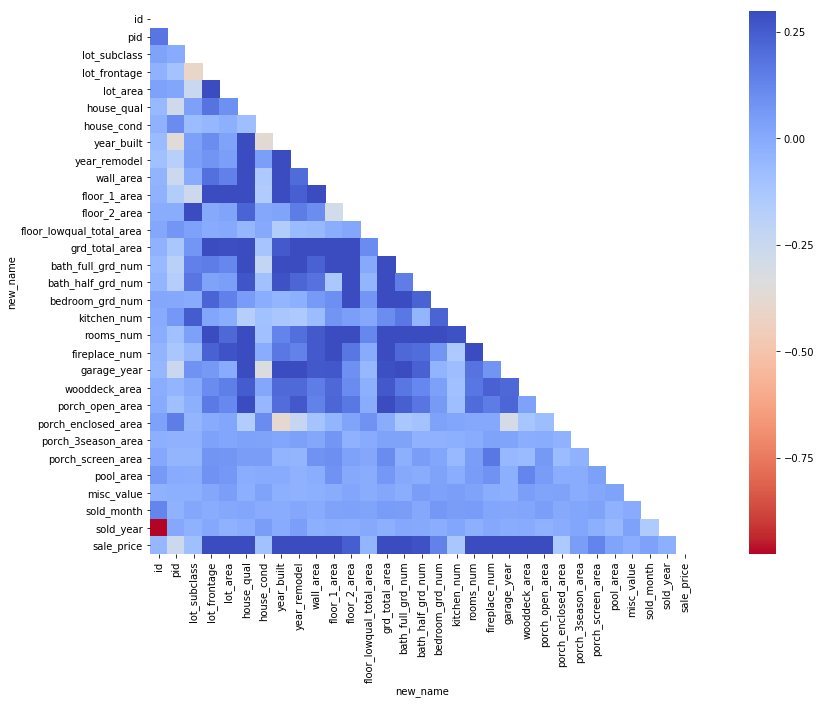

In [25]:
# df_train heatmap (staircase)

corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="coolwarm_r");

In [26]:
# inspect correlation matrix

df_corr = df_train.corr()
print(df_corr.shape)
df_corr['sale_price'].sort_values(ascending=False)

# for further inspection
#df_corr.to_csv(mid_path + 'df_corr.csv')

(31, 31)


new_name
sale_price                  1.000000
house_qual                  0.803462
grd_total_area              0.719463
floor_1_area                0.648252
year_built                  0.572405
year_remodel                0.550872
bath_full_grd_num           0.538225
garage_year                 0.534514
wall_area                   0.520023
rooms_num                   0.509775
fireplace_num               0.473783
lot_frontage                0.355530
porch_open_area             0.338545
wooddeck_area               0.327629
lot_area                    0.303744
bath_half_grd_num           0.283372
floor_2_area                0.248826
bedroom_grd_num             0.137145
porch_screen_area           0.134555
porch_3season_area          0.048721
sold_month                  0.032508
pool_area                   0.025805
misc_value                 -0.010323
sold_year                  -0.015174
floor_lowqual_total_area   -0.041608
id                         -0.051416
lot_subclass               -0

sale price tends to increase as house quality increases.


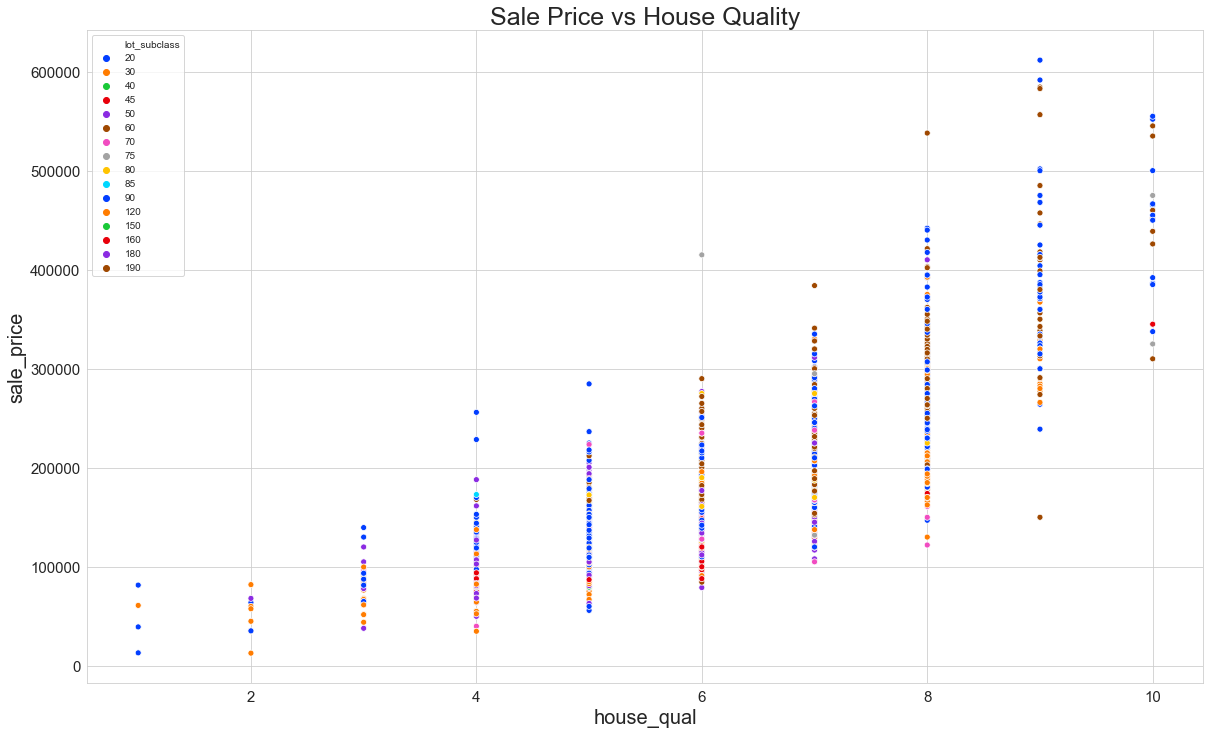

In [27]:
create_scatterplot('Sale Price vs House Quality',df_train,x ='house_qual',y ='sale_price',hue ='lot_subclass')

print("sale price tends to increase as house quality increases.")

plot histograms for all numeric columns to check for zeros and abnormalities.


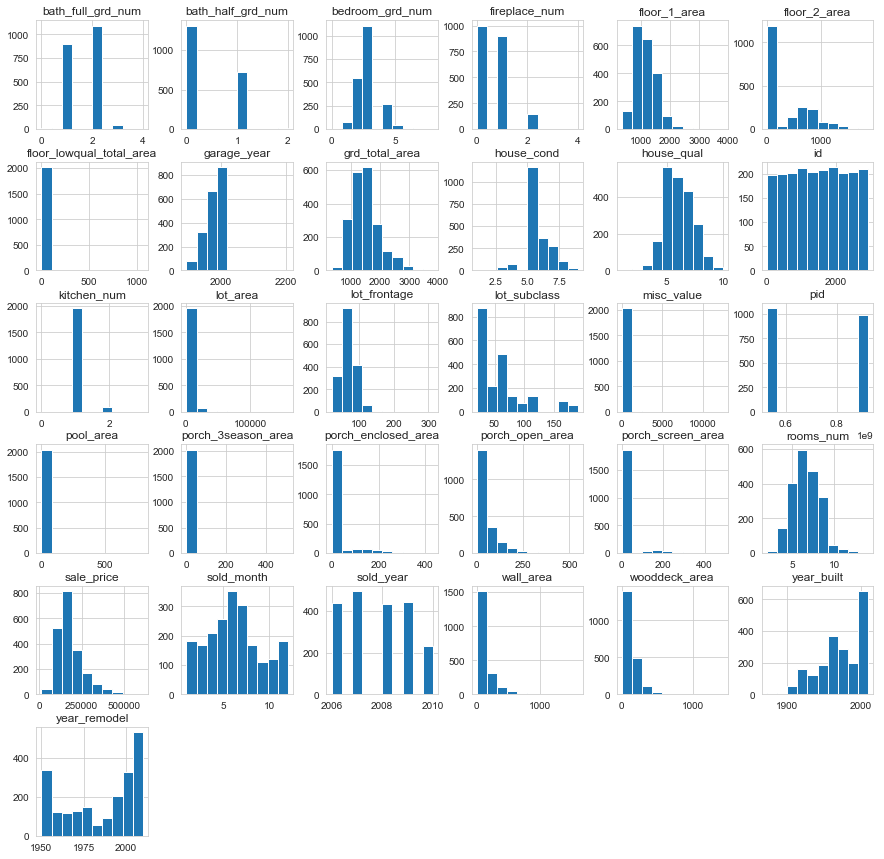

In [28]:
# create histograms for all numeric columns
df_train.hist(figsize=(15, 15));

print('plot histograms for all numeric columns to check for zeros and abnormalities.')

No obvious trends for sale price across years.
Higher sale prices were recorded for houses built after year 2000.


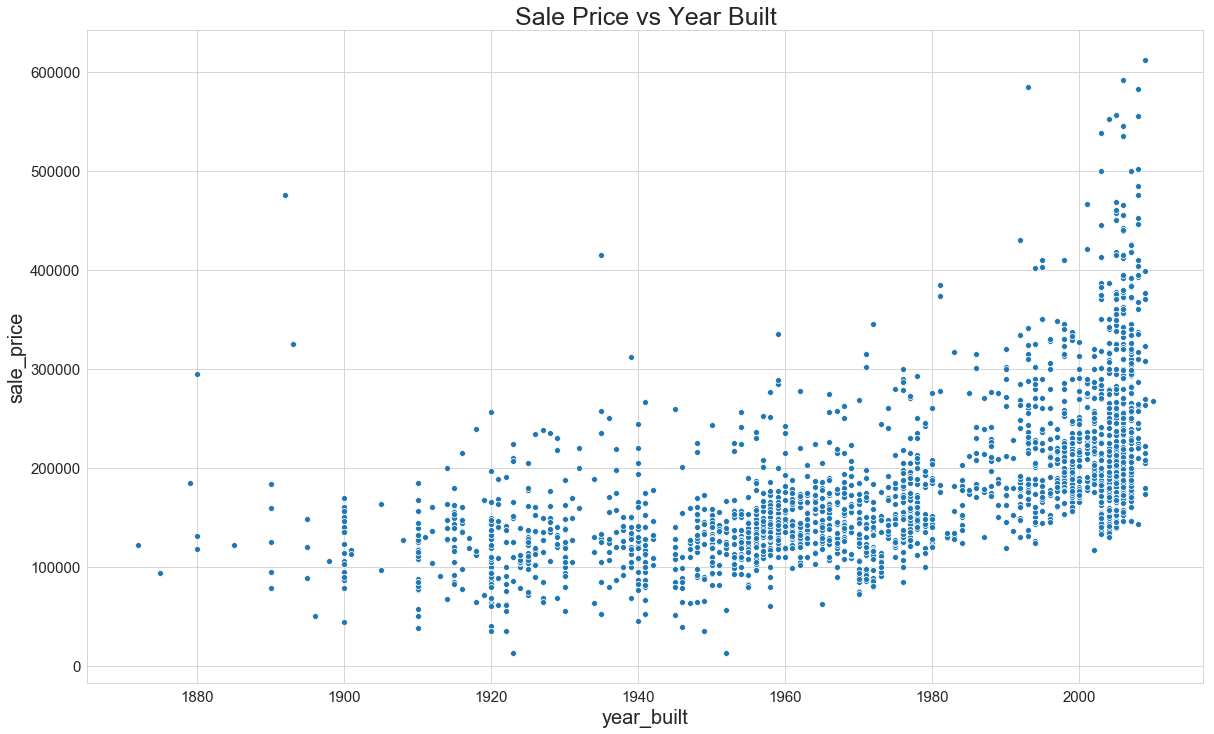

In [29]:
create_scatterplot('Sale Price vs Year Built',df_train,x='year_built',y='sale_price')

print('No obvious trends for sale price across years.')
print('Higher sale prices were recorded for houses built after year 2000.')

More sales price (above 300K) were recoreded for houses remodelled in between 1990 to 2010.
Note: sales price is not normalised for inflation.


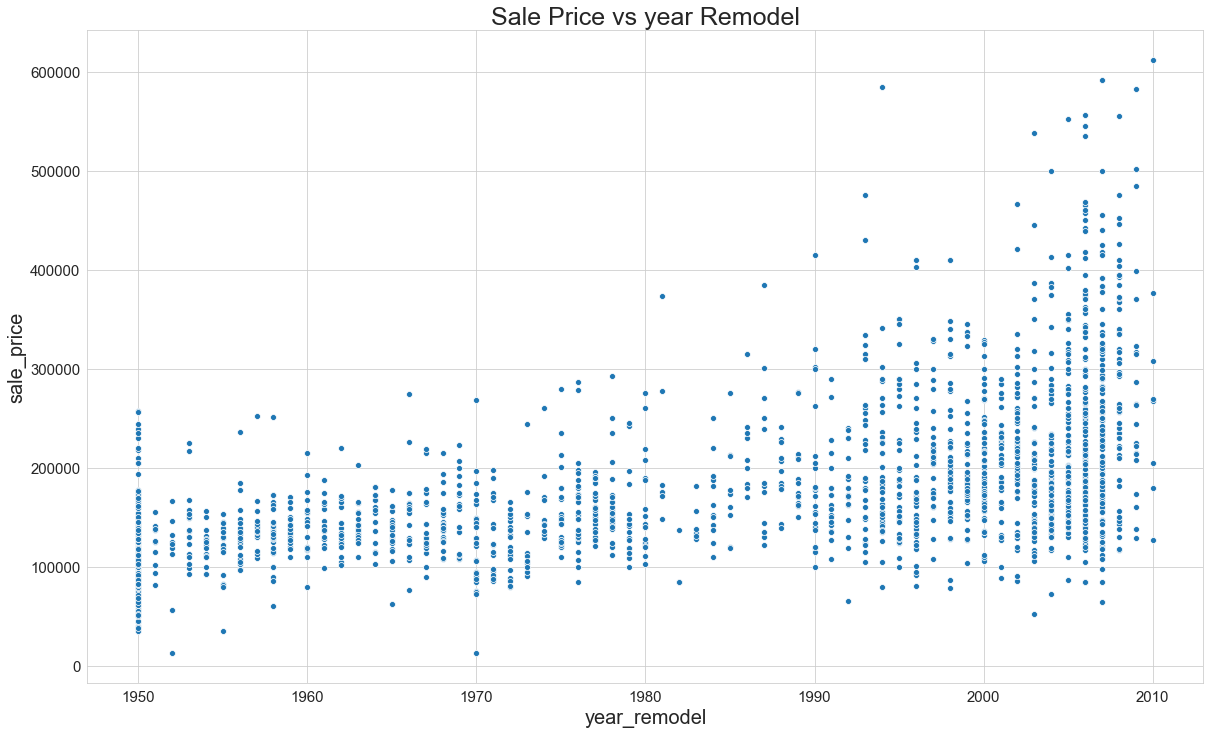

In [30]:
create_scatterplot('Sale Price vs year Remodel',df_train,x='year_remodel',y='sale_price')

print('More sales price (above 300K) were recoreded for houses remodelled in between 1990 to 2010.')
print('Note: sales price is not normalised for inflation.')

Set remove_outliers_flag==True to show 2 outliers (bottom right)


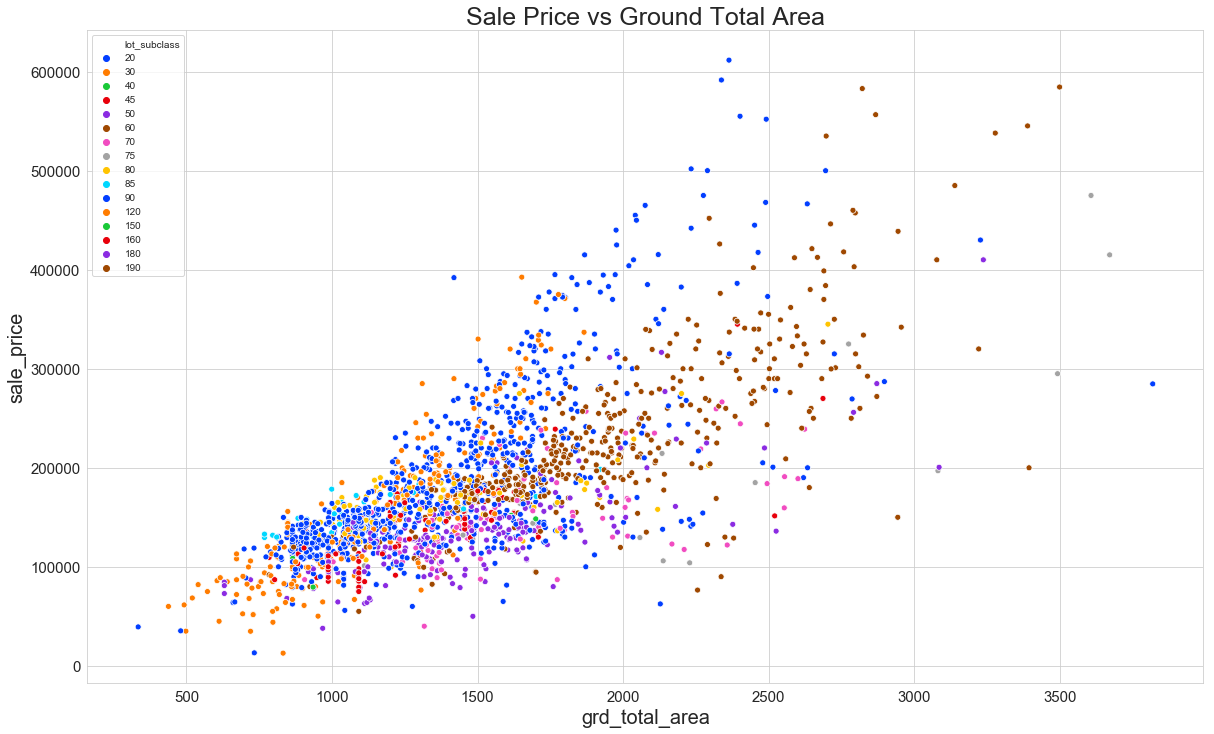

In [31]:
create_scatterplot('Sale Price vs Ground Total Area',df_train,x='grd_total_area',y='sale_price',hue='lot_subclass')

print('Set remove_outliers_flag==True to show 2 outliers (bottom right)')

Experimenting with polynomial features/interaction.
Scatterplot shows no significant trends.


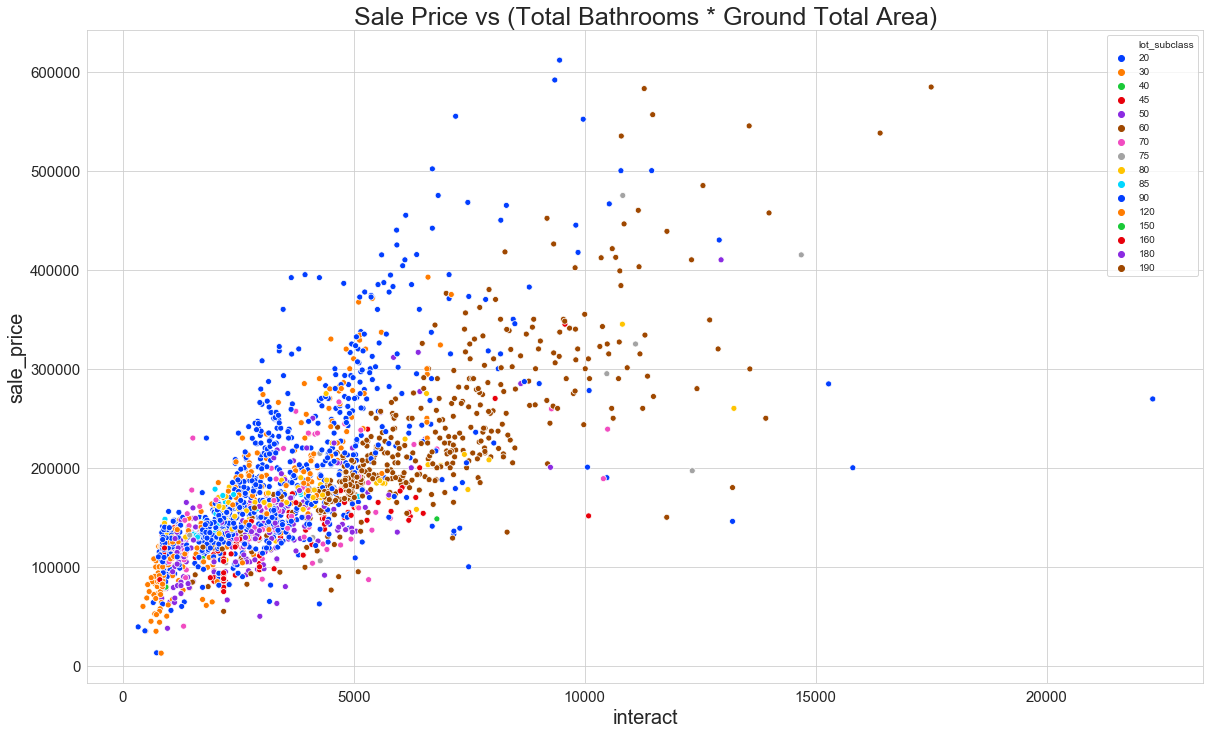

In [32]:
#df_train['interact'] = df_train['bsmt_total_area'] * df_train['grd_total_area']
#df_train['interact'] = df_train['bsmt_total_area'] * df_train['grd_total_area'] * df_train['floor_1_area']

cols = ['bath_full_bsmt_num','bath_half_bsmt_num','bath_half_grd_num','bath_full_grd_num']
for col in cols:
    df_train[col] = pd.to_numeric(df_train[col])

# sum all bathroom in house
df_train['total_bath_num'] = df_train['bath_full_bsmt_num'] + df_train['bath_half_bsmt_num'] +  df_train['bath_half_grd_num'] + df_train['bath_full_grd_num'] 

df_train['interact'] = df_train['total_bath_num'] * df_train['grd_total_area']

# experimenting with polynomial features/interaction
create_scatterplot('Sale Price vs (Total Bathrooms * Ground Total Area)',df_train,x='interact',y='sale_price',hue='lot_subclass')
print('Experimenting with polynomial features/interaction.')
print('Scatterplot shows no significant trends.')

Most subclasses has sale price between 100K to 200K.
4 subclasses have sale price above 200k and they have more outliers.
I will convert lot_subclass to dummy variables for model predictions.


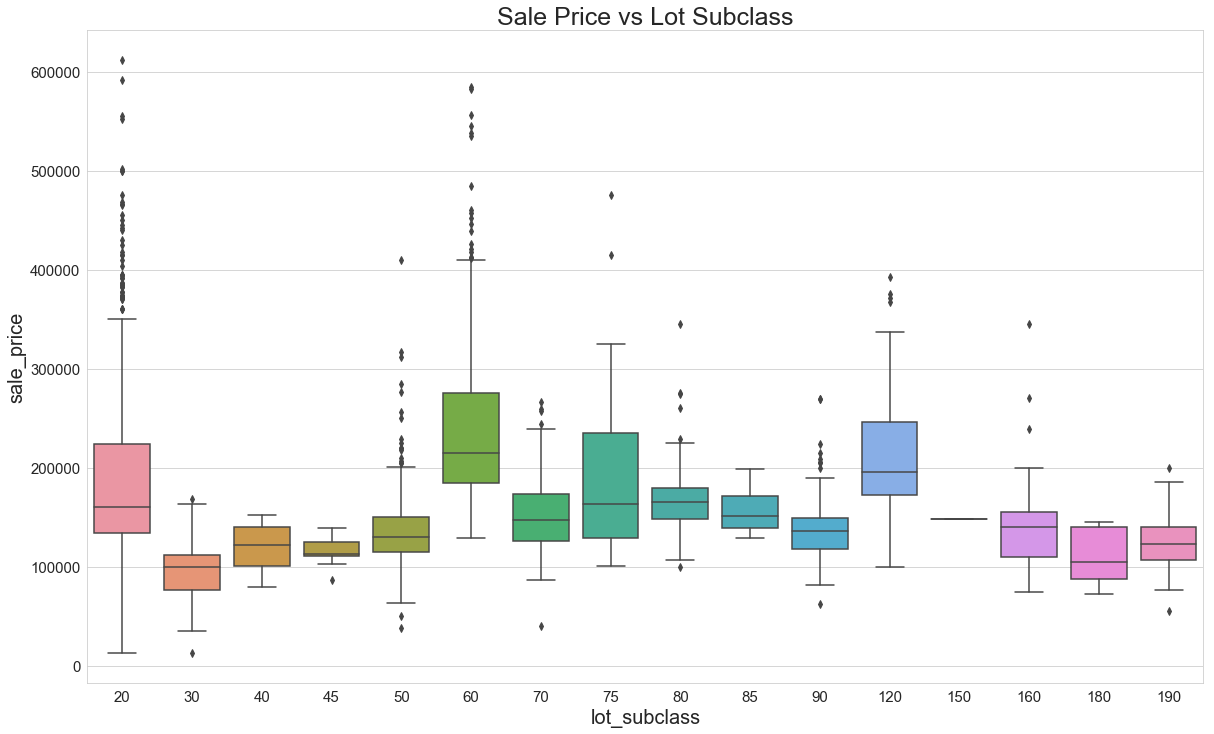

In [33]:
create_boxplot(df_train,x='lot_subclass',y='sale_price',title='Sale Price vs Lot Subclass')

print("Most subclasses has sale price between 100K to 200K.")
print("4 subclasses have sale price above 200k and they have more outliers.")
print("I will convert lot_subclass to dummy variables for model predictions.")

Lot Zone seems to affect Sale Price.
rl (Residential Low Density) and rm (Residential Medium Density) have outliers with high sale prices.
I will convert lot_zone to dummy variables for model predictions.


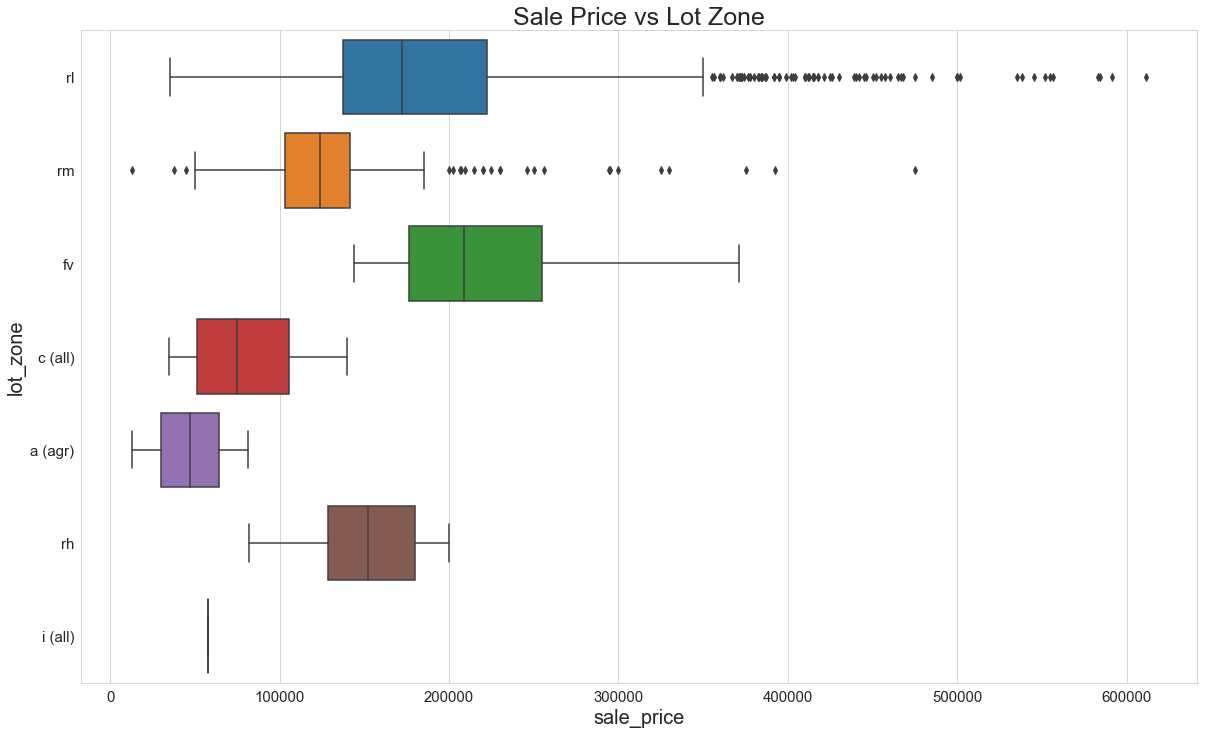

In [34]:
create_boxplot(df_train,x='sale_price',y='lot_zone',title='Sale Price vs Lot Zone')

print('Lot Zone seems to affect Sale Price.')
print('rl (Residential Low Density) and rm (Residential Medium Density) have outliers with high sale prices.')
print("I will convert lot_zone to dummy variables for model predictions.")

Most neighbourhoods have sale price between 100K to 250K
Stone Brook,Northridge Heights,Northridge have the highest sale prices.
I will investigater further in later sections.


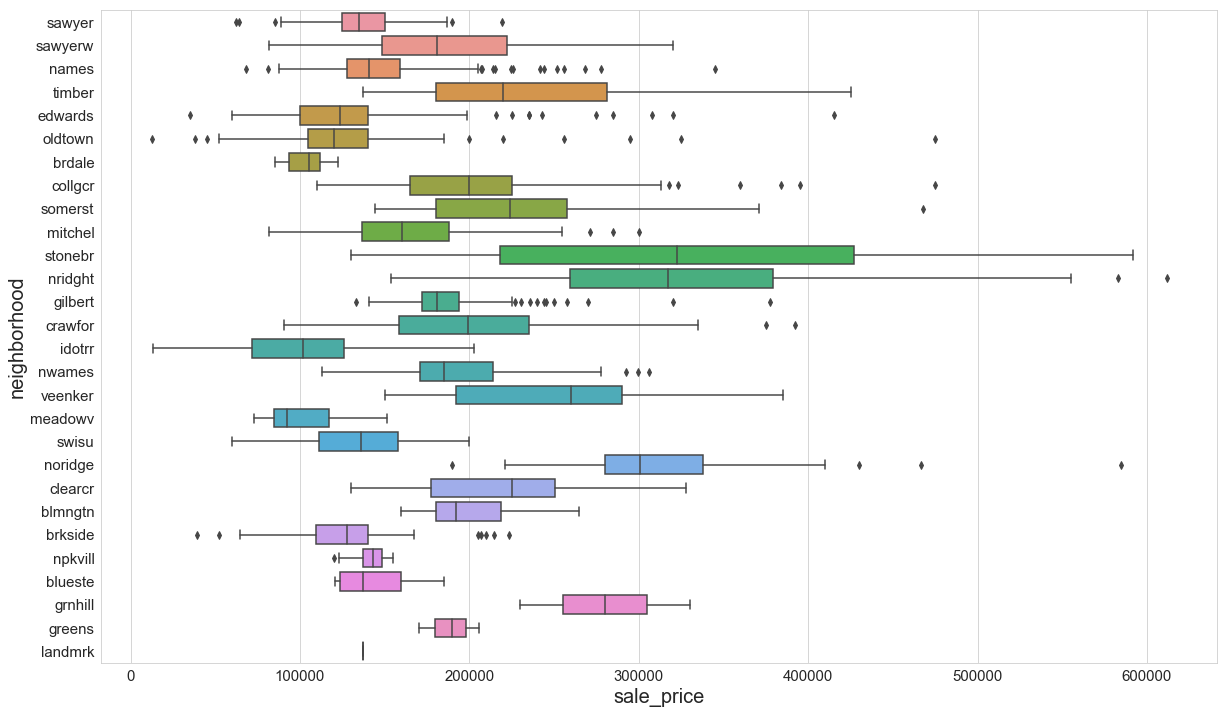

In [35]:
create_boxplot(df_train,x='sale_price',y='neighborhood')

print('Most neighbourhoods have sale price between 100K to 250K')
print('Stone Brook,Northridge Heights,Northridge have the highest sale prices.')
print('I will investigater further in later sections.')

### LR Model Exploratory

In [36]:
# init model
# note: models built in this section (LR Model Exploratory) is not used for final submissions

lr = LinearRegression()

In [37]:
cols = ['house_qual']
lr_model_01 = create_lr_model(df_train,cols,cv=5)

coef: [44270.62578096] intercept: -89387.42447684277
score: 0.6477786291437233
cvs: 0.6444382937193531 [0.63621737 0.65436125 0.66964685 0.6448892  0.6170768 ]


In [38]:
cols = ['grd_total_area']
lr_model_02 = create_lr_model(df_train,cols,cv=5)

coef: [115.97165594] intercept: 7560.444694051635
score: 0.5206091024366111
cvs: 0.5155486704169734 [0.49805863 0.48079625 0.50204936 0.53872008 0.55811904]


In [39]:
cols = ['year_built']
lr_model_03 = create_lr_model(df_train,cols,cv=5)

coef: [1491.55655304] intercept: -2760071.740513484
score: 0.32091007600834687
cvs: 0.3274636656681917 [0.32328019 0.35308495 0.26083223 0.37859706 0.32152391]


In [40]:
cols = ['year_remodel']
lr_model_04 = create_lr_model(df_train,cols,cv=5)

coef: [2090.32155443] intercept: -3966559.2096247063
score: 0.2832283734867208
cvs: 0.3035502219653282 [0.25320325 0.33926255 0.28226149 0.34917944 0.29384438]


In [41]:
cols = ['year_built','year_remodel']
lr_model_05 = create_lr_model(df_train,cols,cv=5)

coef: [ 956.09987639 1213.7846709 ] intercept: -4112477.3421798656
score: 0.37617602929913485
cvs: 0.38818299156381864 [0.36447731 0.42319998 0.33697805 0.44300296 0.37325667]


In [42]:
cols = ['house_qual','grd_total_area']
lr_model_06 = create_lr_model(df_train,cols,cv=5)

coef: [32217.44163985    63.86893771] intercept: -111123.57644207982
score: 0.74026970981523
cvs: 0.7484478238032758 [0.724176   0.75615209 0.76553531 0.75813188 0.73824384]


In [43]:
cols = ['house_qual','year_remodel']
lr_model_07 = create_lr_model(df_train,cols,cv=5)

coef: [40027.44748886   487.97012802] intercept: -1031606.8402852641
score: 0.6556261275103868
cvs: 0.6543084920629026 [0.6470268  0.66596438 0.66909386 0.6586026  0.63085482]


In [44]:
df_train['interact_01'] = df_train['year_built'] * df_train['year_remodel']
cols = ['interact_01']
lr_model_interact_01 = create_lr_model(df_train,cols,cv=5)

coef: [0.53487608] intercept: -1911748.2700246535
score: 0.37750022055049726
cvs: 0.3887851199031435 [0.36889134 0.42245065 0.3351763  0.44312419 0.37428312]


### Create Feature Matrix and Target

In [45]:
# the columns below are omitted infeature matrix (reasons given):

# id: id of rows (not important)
# pid: also id (not important)
# lot_frontage: many rows have missing values
# cond_1: duplicates in cond_2 (need to create set to be useful)
# cond_2: duplicates in cond_1 (need to create set to be useful)
# wall_area: many rows have missing values
# garage_year: many rows have missing values
# sold_month: need to create datetime with sold_year to be useful
# sold_year: need to create datetime with sold_month to be useful

In [46]:
# scale_cols: scale columns using StandardScaler
# dummy_cols: create dummies for these columns

mask_scale = df_cols['type'] == 'Scale'
mask_dummy = df_cols['type'] == 'Dummy'
mask_feature = df_cols['feature'] == 'Yes'

#scale_cols = df_cols['new_name'][mask_scale]
scale_cols = df_cols['new_name'][mask_scale & mask_feature]

#dummy_cols = df_cols['new_name'][mask_dummy]
dummy_cols = df_cols['new_name'][mask_dummy & mask_feature]

In [47]:
# dummy_cols: convert numeric columns to string (before get_dummies)

df_train[dummy_cols]= df_train[dummy_cols].astype(str)
df_test[dummy_cols]= df_test[dummy_cols].astype(str)

In [48]:
# convert selected columns to dummies

if len(dummy_cols) > 0:

    # drop_first=False to avoid dropping the wrong columns for df_train_dummy and df_test_dummy
    df_train_dummy = df_train[dummy_cols]
    df_train_dummy = pd.get_dummies(df_train_dummy,drop_first=False)

    df_test_dummy = df_test[dummy_cols]
    df_test_dummy = pd.get_dummies(df_test_dummy,drop_first=False)

In [49]:
# dummy columns could be missing in df_train or df_test
# need to add back to ensure the same shape for df_train and df_test

if len(dummy_cols) > 0:

    train_cols = set(df_train_dummy.columns)
    test_cols = set(df_test_dummy.columns)
    diff_cols = list(train_cols.difference(test_cols))

    print(diff_cols)
    print('before: ',df_train_dummy.shape,df_test_dummy.shape)

    for col in diff_cols:
        if col not in train_cols:            
            df_train_dummy[col] = 0
            print('create {} in df_train_dummy'.format(col))
        if col not in test_cols:
            df_test_dummy[col] = 0
            print('create {} in df_test_dummy'.format(col))

    print('after: ',df_train_dummy.shape,df_test_dummy.shape)

['lot_zone_a (agr)', 'neighborhood_grnhill', 'exterior_type1_stone', 'utilities_type_nosewa', 'house_fn_sal', 'heating_cond_po', 'bsmt_cond_ex', 'bsmt_cond_po', 'exterior_type2_stone', 'exterior_type1_cblock', 'pool_qual_fa', 'misc_feature_tenc', 'house_fn_sev', 'roof_material_membran', 'pool_qual_gd', 'heating_type_othw', 'neighborhood_landmrk', 'electrical_type_mix', 'lot_subclass_150', 'garage_qual_ex', 'exterior_type1_imstucc', 'heating_type_wall', 'house_qual_1']
before:  (2049, 284) (879, 271)
create lot_zone_a (agr) in df_test_dummy
create neighborhood_grnhill in df_test_dummy
create exterior_type1_stone in df_test_dummy
create utilities_type_nosewa in df_test_dummy
create house_fn_sal in df_test_dummy
create heating_cond_po in df_test_dummy
create bsmt_cond_ex in df_test_dummy
create bsmt_cond_po in df_test_dummy
create exterior_type2_stone in df_test_dummy
create exterior_type1_cblock in df_test_dummy
create pool_qual_fa in df_test_dummy
create misc_feature_tenc in df_test_dum

In [50]:
# drop 1 dummy col for each dummy feature selected

num_col_before = df_train_dummy.shape[1]
print("before:",num_col_before)

for feature in dummy_cols:
    
    #print(feature)
    
    for col in df_train_dummy.columns:
        
        if feature in col:
            df_train_dummy.drop(columns=col,inplace=True)
            df_test_dummy.drop(columns=col,inplace=True)
            print("drop col:",col)
            break   

num_col_after = df_train_dummy.shape[1]
print("after:",num_col_after)
diff_num_col = num_col_before - num_col_after

if diff_num_col == len(dummy_cols):
    print('verified: correct number of dummy columns dropped')
else:
    print('error: number of dummy columns dropped is different from number of dummy features') 

before: 284
drop col: lot_subclass_120
drop col: lot_zone_a (agr)
drop col: access_road_grvl
drop col: access_alley_grvl
drop col: lot_shape_ir1
drop col: land_contour_bnk
drop col: utilities_type_allpub
drop col: lot_config_corner
drop col: land_slope_gtl
drop col: neighborhood_blmngtn
drop col: house_type_1fam
drop col: house_style_1.5fin
drop col: house_qual_1
drop col: house_cond_1
drop col: roof_style_flat
drop col: roof_material_compshg
drop col: exterior_type1_asbshng
drop col: exterior_type2_asbshng
drop col: wall_type_brkcmn
drop col: exterior_qual_ex
drop col: exterior_cond_ex
drop col: foundation_type_brktil
drop col: bsmt_qual_ex
drop col: bsmt_cond_ex
drop col: bsmt_area_av
drop col: bsmt_type1_score_alq
drop col: bsmt_type2_score_alq
drop col: heating_type_gasa
drop col: heating_cond_ex
drop col: central_aircond_n
drop col: electrical_type_fusea
drop col: kitchen_qual_ex
drop col: house_fn_maj1
drop col: fireplace_score_ex
drop col: garage_type_2types
drop col: garage_fin

In [51]:
# create df_xxx_scale from columns selected for scaling
df_train_scale = df_train[scale_cols]
df_test_scale = df_test[scale_cols]

In [52]:
# concat df_xxx_scale and df_xxx_dummy -> df_xxx_2
if len(dummy_cols) > 0:
    df_train_2 = pd.concat([df_train_scale,df_train_dummy],axis=1)
    df_test_2 = pd.concat([df_test_scale,df_test_dummy],axis=1)
    
else:
    df_train_2 = df_train_scale
    df_test_2 = df_test_scale

In [53]:
# create feature matrix (X) and target (Y) from df_train_2
X = df_train_2.values
y = df_train['sale_price'].values # get from df_train as sale_price not in df_train_2

# holdout method (training,validation,testing)
# X_test/y_test renamed to X_valid/y_valid to avoid confusion with df_test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=3050)

# only scale columns in scale_cols
# do not scale columns in dummy cols
num_scale_cols = len(scale_cols)
print(num_scale_cols)

ss = StandardScaler()
ss.fit(X_train[:,0:num_scale_cols])

X_train = ss.transform(X_train[:,0:num_scale_cols])
X_valid = ss.transform(X_valid[:,0:num_scale_cols])

28


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
# create feature matrix (X2) from df_test_2           
X2 = df_test_2.values

X_test = ss.transform(X2[:,0:num_scale_cols])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
# check df_train transformations

if len(dummy_cols) > 0:
    print(df_train_dummy.shape)

print(df_train_scale.shape)
print(df_train_2.shape)
print(X.shape)
print(y.shape)

(2049, 241)
(2049, 28)
(2049, 269)
(2049, 269)
(2049,)


In [56]:
# check df_test transformations

if len(dummy_cols) > 0:
    print(df_test_dummy.shape)

print(df_test_scale.shape)
print(df_test_2.shape)
print(X2.shape)

(879, 251)
(879, 28)
(879, 279)
(879, 279)


In [57]:
# LR Model Polynomial
# section removed (for experimenting)

# use polynomial for df_train_scale
#poly = PolynomialFeatures(2,include_bias=False)

#X_poly = df_train_scale.values
#y = df_train['sale_price'].values # get from df_train as sale_price not in df_train_scale

#X_poly = poly.fit_transform(X_poly)
#cols = poly.get_feature_names(df_train_scale.columns)
#df_poly = pd.DataFrame(X_poly,columns=cols)

#df_poly['sale_price'] = y

# find correlations

#df_poly_corr = df_poly.corr()
#df_poly_corr.head()

# for further investigation
#df_poly_corr.to_csv('df_poly_corr.csv')

# # apply lr_model on X_train and X_test (df_train)
# lr_model = LinearRegression()

# lr_model_poly = lr.fit(X_train,y_train)
# #print('coef: {} intercept: {}'.format(lr_model_poly.coef_,lr_model_poly.intercept_))

# score = lr_model_poly.score(X_test,y_test)
# print('score:',score)

# # perform cross validation on lr_model
# mse = cross_val_score(lr_model_poly,X_poly,Y,cv=5,scoring='neg_mean_squared_error').mean()
# r2 = cross_val_score(lr_model_poly,X_poly,Y,cv=5,scoring='r2').mean()
# print('mse:',mse,'r2',r2)

# # apply lr_model on X_test_2 (df_test)
# lr_y_pred = lr_model_poly.predict(X_test_2)

### LR Model

In [58]:
#init model
lr = LinearRegression()

In [59]:
# perform cross validation
mse = cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error')
r2 = cross_val_score(lr,X,y,cv=5,scoring='r2')

print('mse:',mse.mean(),mse)
print('r2:',r2.mean(),r2)

mse: -549906998.5742208 [-6.46203328e+08 -4.79421428e+08 -4.70513171e+08 -5.71457043e+08
 -5.81940023e+08]
r2: 0.9120860853004483 [0.89735084 0.91996248 0.92675096 0.89987128 0.91649487]


In [60]:
# fit model

lr.fit(X_train, y_train)

# score model
print("train r2:",lr.score(X_train, y_train))
print("validation r2:",lr.score(X_valid, y_valid))

# validate model
y_pred = lr.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
print("rmse:",rmse)

# model predictions
lr_pred = lr.predict(X_test)

train r2: 0.8389287083934722
validation r2: 0.8317395840615764
rmse: 32925.9944036195


### Ridge Model

In [61]:
# init model

# method 1
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

# method 2
#r_alphas = np.logspace(0, 5, 200)
#ridge = RidgeCV(alphas=r_alphas)

# method 3
#ridge = RidgeCV(n_alphas=ridge_optimal_alpha, store_cv_values=True)

# method 4
#ridge_optimal_alpha = 30.36771118035459
#ridge = Ridge(n_alpha=ridge_optimal_alpha)

In [62]:
# perform cross validation
mse = cross_val_score(ridge,X,y,cv=5,scoring='neg_mean_squared_error')
r2 = cross_val_score(ridge,X,y,cv=5,scoring='r2')

print('mse:',mse.mean(),mse)
print('r2:',r2.mean(),r2)

mse: -508915035.506011 [-5.78565840e+08 -4.52231089e+08 -4.38478427e+08 -5.03821249e+08
 -5.71478573e+08]
r2: 0.9188106288127175 [0.90809503 0.9245018  0.93173809 0.91172219 0.91799603]


In [63]:
# fit model
ridge.fit(X_train, y_train)

# score model
print("train r2:",ridge.score(X_train, y_train))
print("validation r2:",ridge.score(X_valid, y_valid))

# validate model
y_pred = ridge.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
print("rmse:",rmse)

# model predictions
ridge_pred = ridge.predict(X_test)

#ridge_optimal_alpha = ridge.alpha_
#ridge_optimal_alpha

train r2: 0.838904988957888
validation r2: 0.8317982732402858
rmse: 32920.25161470079


### Lasso Model

In [64]:
# init model

# method 1
lasso = LassoCV(n_alphas=200)

# method 2
#l_alphas = np.arange(0.001, 0.15, 0.0025)
#lasso = LassoCV(alphas=l_alphas,cv=5)

# method 3
#lasso = LassoCV(n_alphas=lasso_optimal_alpha, cv=5)

# method 4
#lasso_optimal_alpha = 0.1485
#lasso = Lasso(n_alpha=lasso_optimal_alpha)

In [65]:
# perform cross validation
mse = cross_val_score(lasso,X,y,cv=5,scoring='neg_mean_squared_error')
r2 = cross_val_score(lasso,X,y,cv=5,scoring='r2')

print('mse:',mse.mean(),mse)
print('r2:',r2.mean(),r2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

mse: -1273447927.813888 [-1.48757074e+09 -1.15863920e+09 -1.30517614e+09 -9.97455929e+08
 -1.41839763e+09]
r2: 0.7977556465845449 [0.76369994 0.80656975 0.79681142 0.82522923 0.7964679 ]


In [66]:
# fit model
lasso.fit(X_train, y_train)

# score model
print("train r2:",lasso.score(X_train, y_train))
print("validation r2:",lasso.score(X_valid, y_valid))

# validate model
y_pred = lasso.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
print("rmse:",rmse)

# model predictions
lasso_pred = lasso.predict(X_test)

#lasso_optimal_alpha = lasso.alpha_
#lasso_optimal_alpha

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


train r2: 0.8376766559920211
validation r2: 0.8320113078707763
rmse: 32899.39756107384


### Output Model Predictions

In [67]:
# output to csv

# data/output folder contains 3 subfolders:
# submit: output files submitted to kaggle
# output: output files not submitted to kaggle
# error: output files with error (not submitted to kaggle)

if output_predictions_flag == True:    

    timestamp = dt.datetime.now()
    timestamp = timestamp.strftime(" %Y_%m_%d %H_%M_%S ")

    df_lr = pd.DataFrame(df_test,columns=['id'])
    df_ridge = pd.DataFrame(df_test,columns=['id'])
    df_lasso = pd.DataFrame(df_test,columns=['id'])
    
    df_lr['SalePrice'] = lr_pred
    df_ridge['SalePrice'] = ridge_pred
    df_lasso['SalePrice'] = lasso_pred

    df_lr.sort_values(by='id',inplace=True)
    df_ridge.sort_values(by='id',inplace=True)
    df_lasso.sort_values(by='id',inplace=True)

    df_lr.to_csv(output_path + 'submission' + timestamp + 'lr.csv',index=False)
    df_ridge.to_csv(output_path + 'submission' + timestamp + 'ridge.csv',index=False)
    df_lasso.to_csv(output_path + 'submission' + timestamp + 'lasso.csv',index=False)
    
    # contains selected columns for feature matrix
    df_cols.to_csv(output_path + 'columns' + timestamp + '.csv')

### Kaggle Submission 

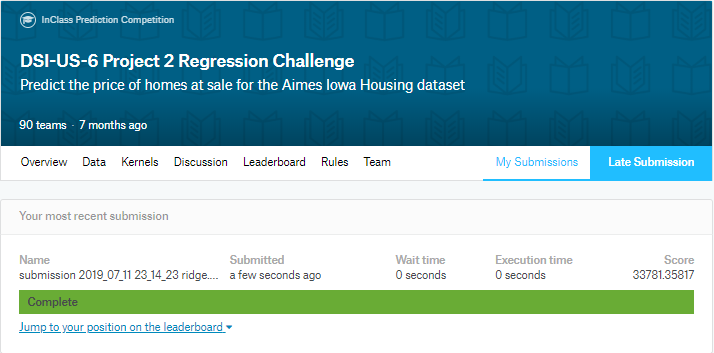

In [68]:
# kaggle submission screenshot 1

Image(filename = image_path + "kaggle_01.png")

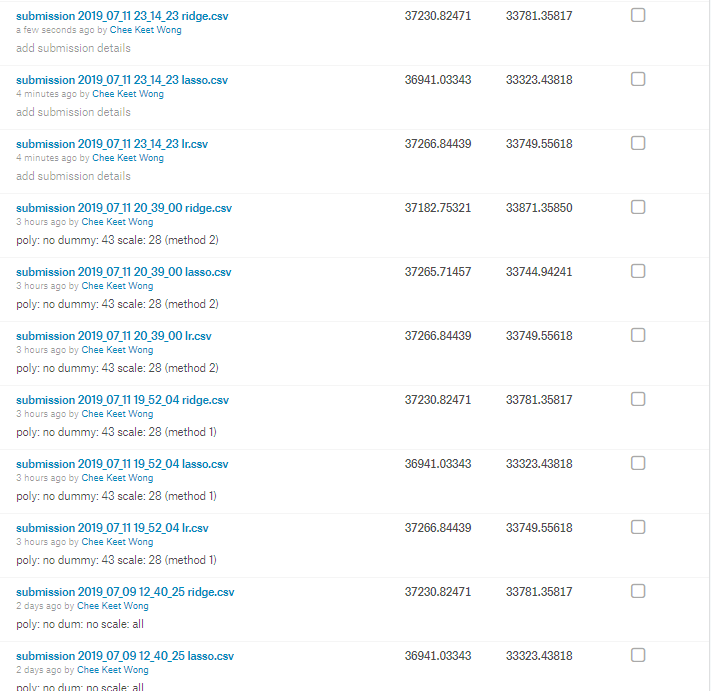

In [69]:
# kaggle submission screenshot 2

Image(filename = image_path + "kaggle_02.png")

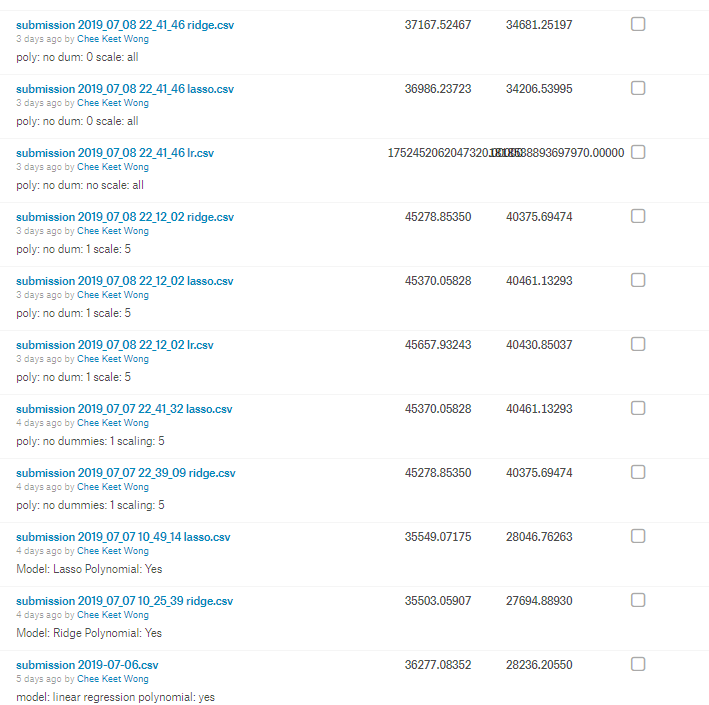

In [70]:
# kaggle submission screenshot 3

Image(filename = image_path + "kaggle_03.png")

### Descriptive and Inferential Statistics

**Lot Subclass vs Lot Zone** 

In [71]:
# create df_lot before using groupby
cols = ['lot_zone','lot_subclass','sale_price']
df_lot = df_train[cols]

# rename values to provide descriptive names for scatterplot
df_lot['lot_subclass'] = df_lot['lot_subclass'].map(lot_subclass_dict)
df_lot['lot_zone'] = df_lot['lot_zone'].map(lot_zone_dict)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [72]:
# groupby to find avg sale_price for specific lot_subclass and lot_zone
cols = ['lot_subclass','lot_zone']
df_lot_2 = df_lot.groupby(cols).mean()
df_lot_2.reset_index(inplace=True)
df_lot_2.sort_values(by='lot_subclass',ascending=False,inplace=True)

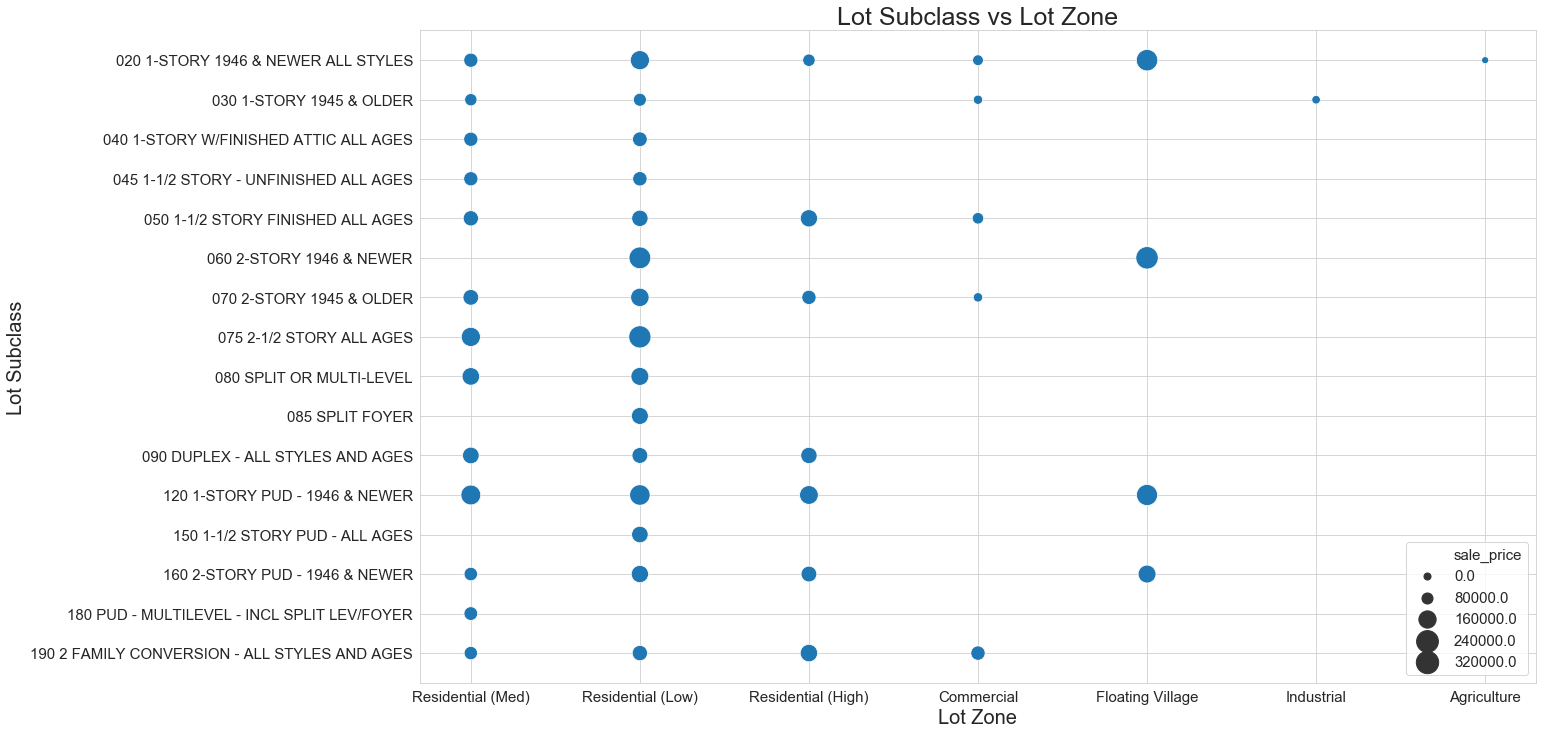

In [73]:
# plot scatterplot
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_lot_2,x='lot_zone',y='lot_subclass',size='sale_price',sizes=(50,500))

plt.title('Lot Subclass vs Lot Zone',fontsize=25)
plt.xlabel('Lot Zone',fontsize=20)
plt.ylabel('Lot Subclass',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

- Bigger bubble size represents higher average Sale Price for the specific Lot Subclass and Lot Zone.
- The plot shows there is great variety of house type (Lot Subclass) sold in Residential Zones, especially in zones with low and med densities. The average Sale Price is generally higher for Residental Zones.
- Lesser variety of Lot Subclass is observed for Industrial and Agriculture Zones: 


Industrial: 030 1-STORY 1945 & OLDER<br>
Agriculture: 020 1-STORY 1946 & NEWER ALL STYLES


Interesting Note: Houses sold for Industrial and Agriculture were only 1 story high although they have different Lot Subclasses.

**Top 3 Neighbourhood**

In [74]:
# create df_neighbor to review top 3 neighbourhoods vs the rest
cols = ['house_qual','sale_price','neighborhood','grd_total_area','year_built']
df_neighbor = df_train[cols]
df_neighbor['house_qual'] = pd.to_numeric(df_neighbor['house_qual'])
df_neighbor = df_neighbor.sort_values(by='house_qual')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [75]:
# rename remaining neighbourhoods to others
tgt_neighborhood = ['stonebr','noridge','nridght']
mask_neighbor = df_neighbor['neighborhood'].isin(tgt_neighborhood)
df_neighbor['neighborhood'][~mask_neighbor] = 'others'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


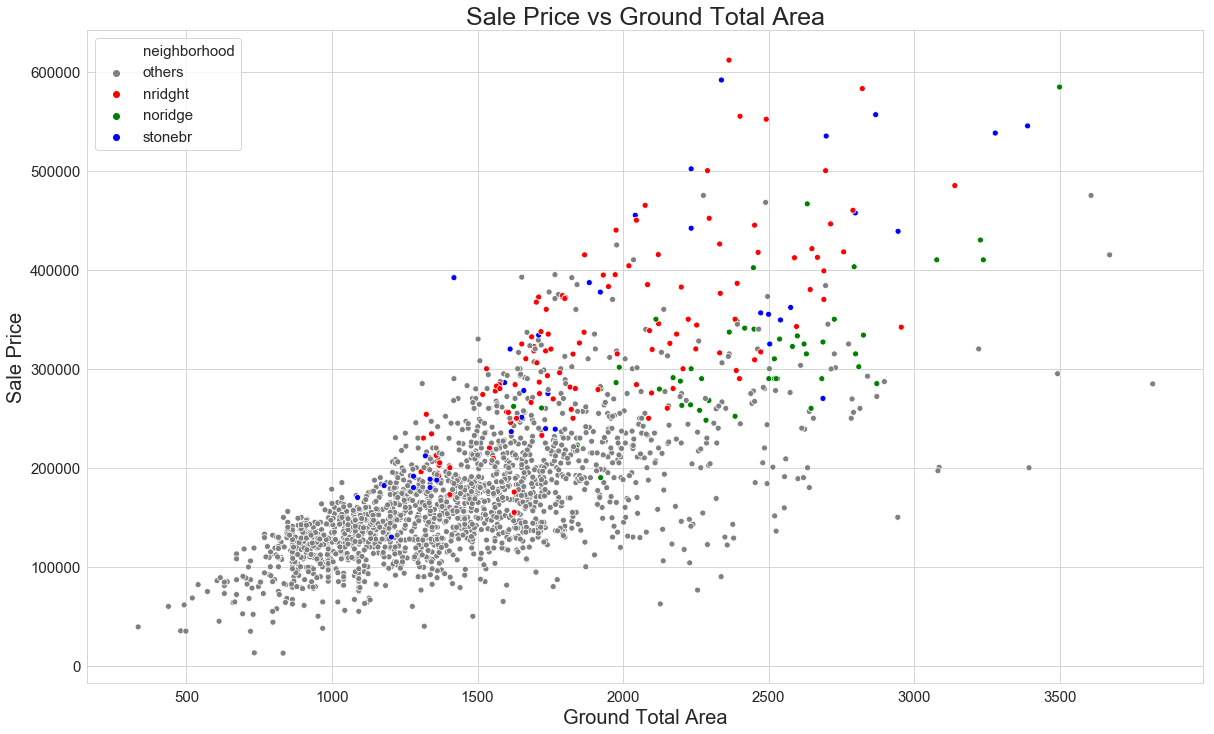

In [76]:
# scatterplot 1

color_dict = dict({
    
    'stonebr':'blue',
    'noridge':'green',
    'nridght': 'red',
    'others': 'grey',
})

plt.figure(figsize=(20,12))

sns.scatterplot(data=df_neighbor,x='grd_total_area',y='sale_price',hue='neighborhood',palette=color_dict)

plt.title('Sale Price vs Ground Total Area',fontsize=25)
plt.xlabel('Ground Total Area',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

- Stone Brook, Northridge Heights and Northridge neighbourhoods have the highest sale prices (from EDA conducted earlier).
- The scatterplot above compares the top 3 neighbourhoods against the rest.
- The plot shows these neighbourhoods generally has higher floor area (Ground Total Area) and higher sale prices.

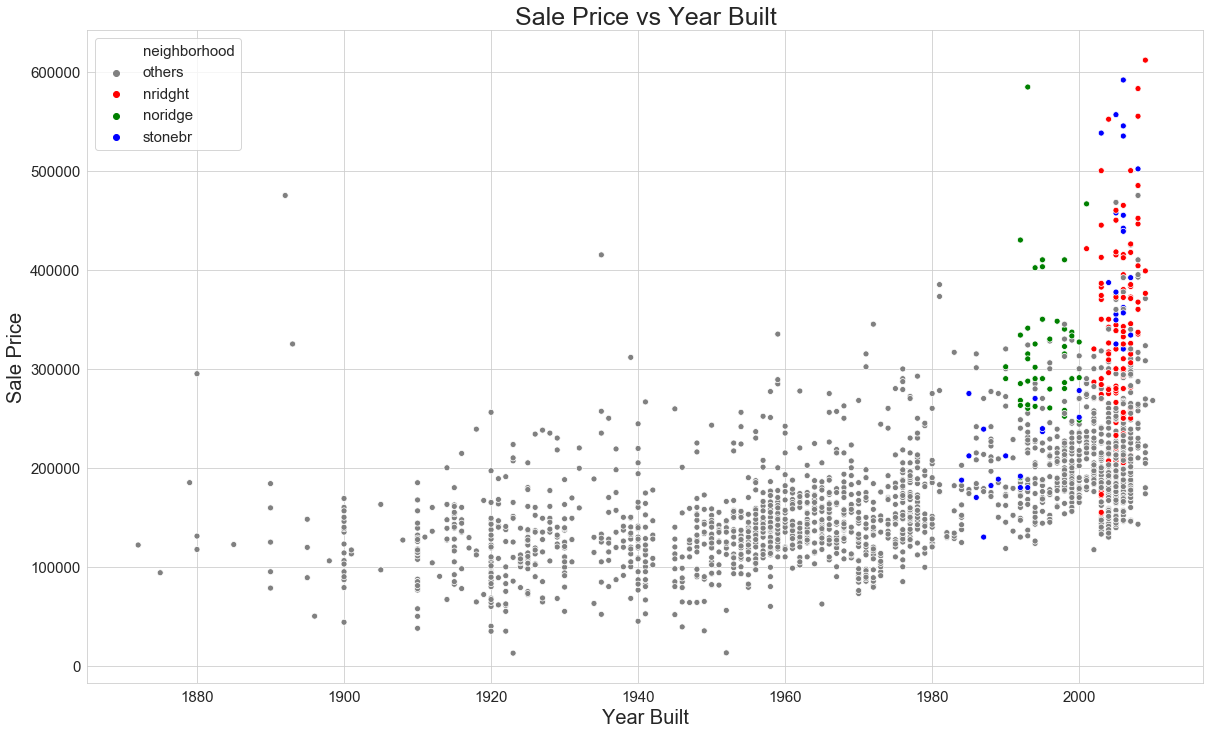

In [77]:
# scatterplot 2
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_neighbor,x='year_built',y='sale_price',hue='neighborhood',palette=color_dict)

plt.title('Sale Price vs Year Built',fontsize=25)
plt.xlabel('Year Built',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

- The scatterplot above shows houses sold, in the top 3 neighbourhood, are newer compared to other neighbourhoods.

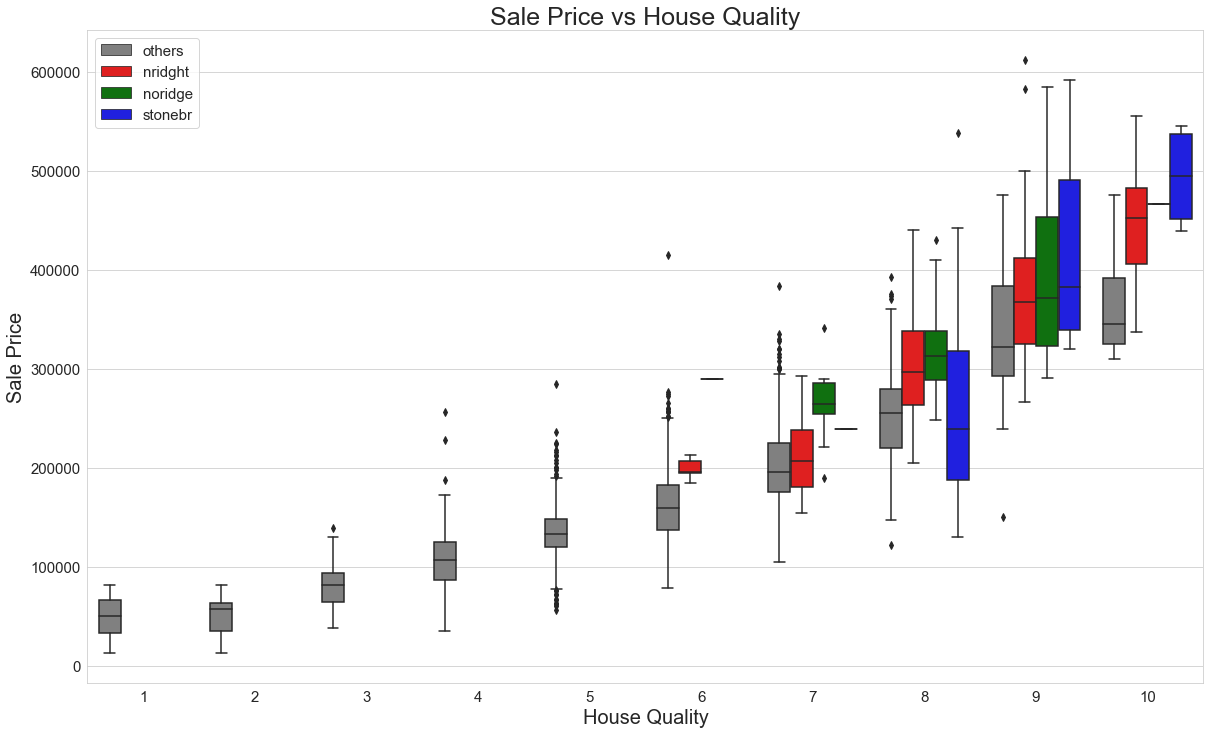

In [78]:
# boxplot 2
plt.figure(figsize=(20,12))
sns.boxplot(data=df_neighbor,x='house_qual',y='sale_price',hue='neighborhood',palette=color_dict)

plt.title('Sale Price vs House Quality',fontsize=25)
plt.xlabel('House Quality',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15);

- Boxplot above shows house quality and sale price have positive correlations.
- The houses sold in the top 3 neighbourhoods have minimal score of 6.

### Outside Research

**Northridge Heights**

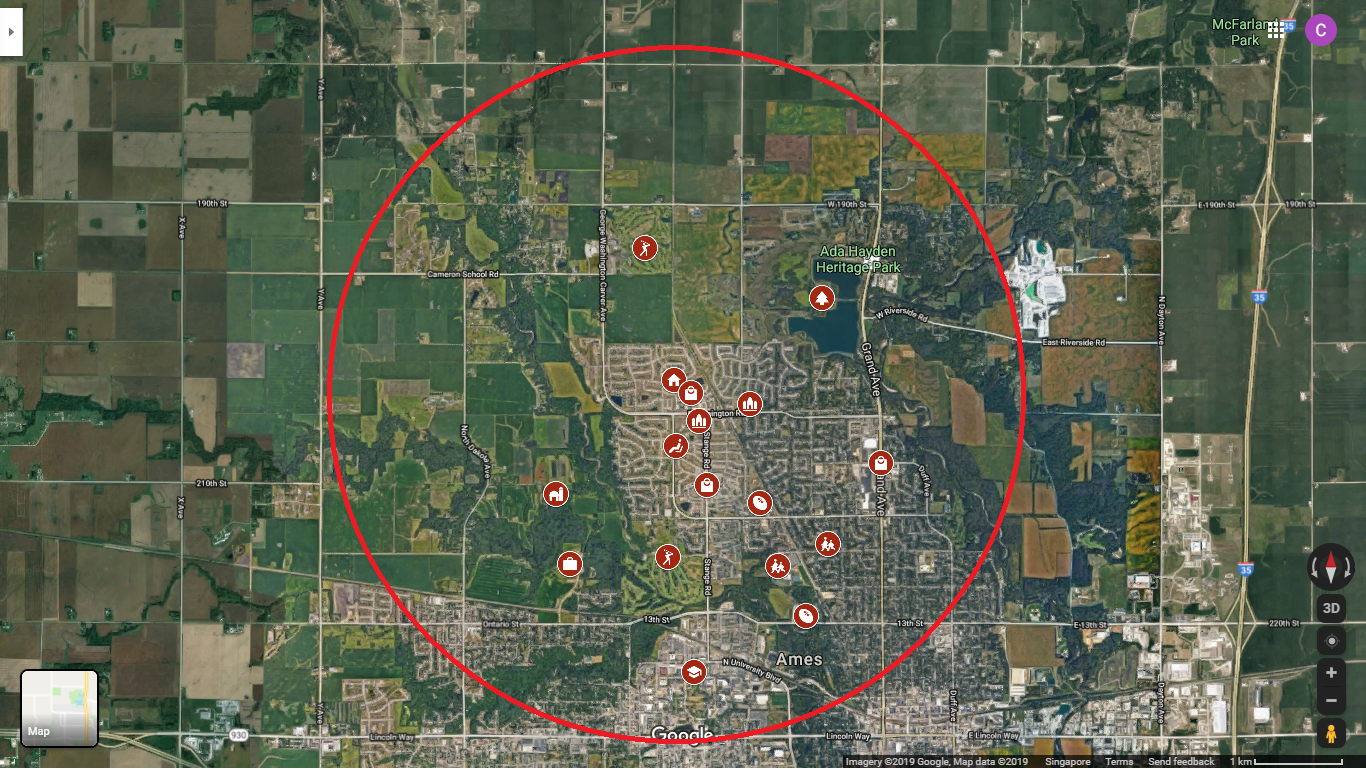

In [79]:
# output map

Image(filename = image_path + "northridge_heights_icons_4km.png")

- Northridge Heights is represented by the house icon (in the centre of circle with 4km radius).
- The neighbourhood is located north of most amenities e.g. shopping, sports amenities and churches.
- Iowa University is located 4km south of the neighbourhood.

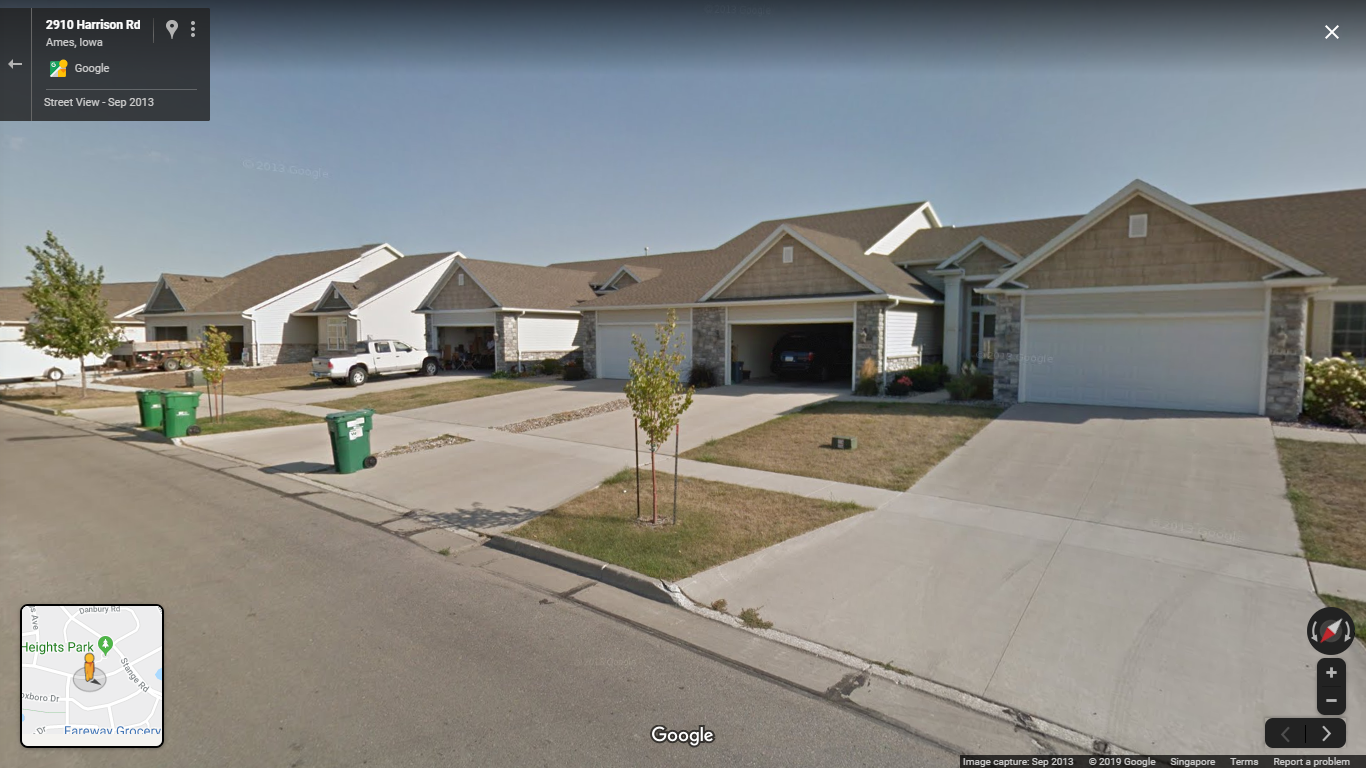

In [80]:
# StreetView Screenshot

Image(filename = image_path + "northridge_heights_houses.png")

- Above shows the streetview of a few houses in Northridge Heights.
- The houses look well maintained and relatively new.
- The earlier boxplot shows that house quality is an important factor for sales prices.

Neighbourhood Review : [Address Report](https://www.addressreport.com/report/neighborhood/ames-ia/northridge-heights-ames-ia/)

- Residents in the neighbourhood have average expenses (2% higher than national average).
- The neighbourhood has high ownership rate (83% occupied by owners).
- Crime rate is also low (53% lower than national average).

### Conclusions and Recommendations

- The Lasso Regression Model will be selected for sale price predictions. The model has the lowest RMSE score of 32899 (among the 3 models) and good R2 score of 0.832.

**Real Estate Agents**

- The "Lot Subclass vs Lot Zone" scatterplot may indicate that higher demands for houses in residential zones. Additional research should be done on the demand and supply of houses in Ames (Iowa).
- The scatterplot shows that "Floating Village" Zone has above average sale prices. Perhaps property agents can focus on these zones to maximum profits.

**Homeowners**

- Homeowners can focus on making some home improvements before selling their houses to improve sale prices; House Quality and Year Remodel are the top 5 factors for high sales prices (based on correlation matrix).
- Homeowners can look to purchase house in neighbourhoods with good amenities nearby.

**Recommendations**

1. Conduct market research on population demographics in Ames (Iowa).
2. Gather information on economical data e.g. salary,retrenchment rate (which may affect sales prices).
3. Get additional housing data for Ames (Iowa) e.g. seller/buyer data, house price index and price per sqft.